<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-12-05 20:52:04
-------------------
qualified stocks: 86
with latest results: 25
still star stocks: 15
-------------------
Initial Investment:  1.28 C
CY Investment:  1.55 C
Reserve:  66.76 K
Current:  1.42 C
-------------------
Today PnL: -60.03 K (-0.42%)
Current PnL: -25.12 L (-16.23%)
CY Booked + Current PnL: -10.83 L (-7.0%)
-------------------
Total profit:  1.49 L
Total loss:  -26.61 L
-------------------
Total Booked + Current PnL: 16.15 L (12.63%)
Total Booked PnL: 41.27 L (32.29%)
Curr Year Booked PnL: 14.29 L (10.07%)
Prev Year Booked PnL: 26.98 L (21.11%)
Est FTT:  2.32 C
Est FTT PnL: 90.40 L (63.7%)
Deployed:  1.28 C
Current:  1.42 C
CAGR/XIRR %: 5.94%
Row successfully appended and saved to data/myPortfolioDB.csv.


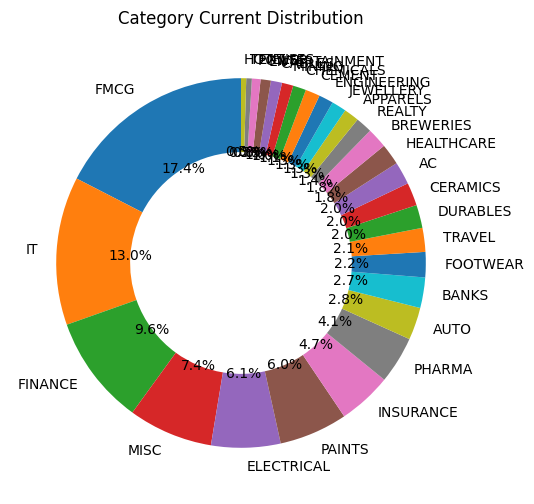

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
77,TTKPRESTIG,769.29,770.00,95.09,2.54,M-SC,38.0,84030.0,-16747.0,16840.0,...,-16.62,20.04,0.09,253.0,-0.99,0.59,10.40,OX40N,DURABLES,NTT
39,INDIGOPNTS,1407.73,1408.00,133.82,16.63,M-SC,52.0,153202.0,-21357.0,21387.0,...,-12.23,13.96,0.02,234.0,-1.00,1.08,33.26,OX40N,PAINTS,NTT
50,MASFIN,326.60,398.61,-15.54,6.68,H-SC,58.0,96180.0,-1800.0,23401.0,...,-1.84,24.33,22.05,164.0,-0.08,0.68,39.80,XR,FINANCE,ATH
43,ITC,408.01,452.00,-40.74,1.56,X-LC,49.0,238516.0,-1802.0,27716.0,...,-0.75,11.62,10.78,5.0,-0.07,1.69,4.45,X40,FMCG,NTT
35,ICICIGI,1887.82,2252.93,-17.43,6.44,X-MC,46.0,209286.0,9177.0,29530.0,...,4.59,14.11,19.34,68.0,0.31,1.48,21.26,X40,INSURANCE,ATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,2379.51,3906.00,-55.88,1.55,X-SC,38.0,179820.0,-58131.0,210785.0,...,-24.43,117.22,64.15,82.0,-0.28,1.27,0.87,XY24,CEMENT,BTT
8,AWL,315.97,485.00,-61.33,1.44,X-MC,36.0,241424.0,-60327.0,221748.0,...,-19.99,91.85,53.50,58.0,-0.27,1.71,7.23,XY24,FMCG,NTT
60,REPCOHOME,463.60,880.00,-56.04,7.98,H-SC,46.0,251310.0,-35195.0,292525.0,...,-12.28,116.40,89.82,160.0,-0.12,1.78,32.96,XY24,FINANCE,NTT
10,BANDHANBNK,207.88,400.00,32.18,7.02,H-SC,25.0,187707.0,-90852.0,348290.0,...,-32.62,185.55,92.42,170.0,-0.26,1.33,8.48,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ABBOTINDIA,29809.17,35195.00,-16.77,4.19,X-MC,41.0,173670.0,-5185.0,37495.0,...,-2.90,21.59,18.07,63.0,-0.14,1.23,15.08,X40,PHARMA,ATH
3,ACC,2379.51,3906.00,-55.88,1.55,X-SC,38.0,179820.0,-58131.0,210785.0,...,-24.43,117.22,64.15,82.0,-0.28,1.27,0.87,XY24,CEMENT,BTT
5,ASIANPAINT,2861.00,3460.25,2.74,18.48,X-LC,80.0,261228.0,9460.0,43285.0,...,3.76,16.57,20.95,31.0,0.22,1.85,40.73,X40,PAINTS,ATH
8,AWL,315.97,485.00,-61.33,1.44,X-MC,36.0,241424.0,-60327.0,221748.0,...,-19.99,91.85,53.50,58.0,-0.27,1.71,7.23,XY24,FMCG,NTT
9,BAJAJHFL,116.74,181.50,-27.39,10.02,X-MC,12.0,199126.0,-44160.0,179114.0,...,-18.15,89.95,55.47,64.0,-0.25,1.41,0.00,X40N,FINANCE,ATH
11,BATAINDIA,1550.24,2096.00,5.27,14.69,X-SC,26.0,80257.0,-48413.0,93708.0,...,-37.63,116.76,35.20,92.0,-0.52,0.57,0.69,X40,FOOTWEAR,NTT
12,BERGEPAINT,561.33,680.00,-8.27,4.86,X-MC,45.0,224572.0,-2767.0,50821.0,...,-1.22,22.63,21.14,74.0,-0.05,1.59,26.58,XY24,PAINTS,NTT
15,CAMS,763.20,950.00,-80.65,5.20,X-SC,7.0,255981.0,4125.0,57519.0,...,1.64,22.47,24.48,86.0,0.07,1.81,0.00,X40N,MISC,NTT
17,COALINDIA,406.65,484.83,9.65,2.38,L-LC,52.0,140582.0,-9878.0,38801.0,...,-6.57,27.60,19.23,179.0,-0.25,1.00,13.31,XY25,MINING,ATH
19,COLPAL,2633.65,3726.84,-2.12,7.29,X-MC,48.0,216440.0,-46925.0,156248.0,...,-17.82,72.19,41.51,61.0,-0.30,1.53,2.97,XY25,FMCG,ATH


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.00,92.31,11.62,H-SC,44.0,130811.0,-87685.0,115872.0,...,-40.13,88.58,12.90,161.0,-0.76,0.93,8.77,OX40N,FINANCE,NTT
16,CERA,7647.97,9475.00,-32.70,8.31,H-SC,29.0,122912.0,-52991.0,95011.0,...,-30.13,77.30,23.89,157.0,-0.56,0.87,6.15,OX40N,CERAMICS,NTT
25,FINCABLES,789.54,1641.55,-24.20,11.28,M-SC,30.0,137735.0,-9909.0,169235.0,...,-6.71,122.87,107.91,216.0,-0.06,0.98,0.00,OX40N,CABLES,ATH
39,INDIGOPNTS,1407.73,1408.00,133.82,16.63,M-SC,52.0,153202.0,-21357.0,21387.0,...,-12.23,13.96,0.02,234.0,-1.00,1.08,33.26,OX40N,PAINTS,NTT
44,JCHAC,2282.24,2282.00,16791.30,1.45,M-SC,7.0,82510.0,-45295.0,45281.0,...,-35.44,54.88,-0.01,233.0,-1.00,0.58,0.00,OX40N,AC,NTT
47,KANSAINER,299.63,340.00,-68.70,2.60,H-SC,31.0,205299.0,-64368.0,100699.0,...,-23.87,49.05,13.47,158.0,-0.64,1.45,4.39,XY24,PAINTS,NTT
56,RAJESHEXPO,517.65,518.00,1692.93,2.33,L-SC,47.0,48932.0,-88245.0,88337.0,...,-64.33,180.53,0.07,268.0,-1.00,0.35,21.70,OX40N,JEWELLERY,NTT
63,SFL,1016.35,1287.00,16.60,8.75,M-SC,33.0,153845.0,-108373.0,178199.0,...,-41.33,115.83,26.63,239.0,-0.61,1.09,0.54,XY24,MISC,NTT
66,SIS,435.42,528.00,1979.27,4.09,H-SC,47.0,83908.0,-27124.0,50731.0,...,-24.43,60.46,21.26,166.0,-0.53,0.59,13.37,OX40N,MISC,NTT
70,SYMPHONY,1306.42,1306.00,-46.27,16.93,M-SC,46.0,114514.0,-56627.0,56570.0,...,-33.09,49.40,-0.03,206.0,-1.00,0.81,1.95,OX40N,DURABLES,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
3,ACC,2379.51,3906.00,-55.88,1.55,X-SC,38.0,179820.0,-58131.0,210785.0,...,-24.43,117.22,64.15,82.0,-0.28,1.27,0.87,XY24,CEMENT,BTT
7,ATULAUTO,579.80,844.00,3256.76,3.40,M-SC,38.0,150688.0,-46444.0,136267.0,...,-23.56,90.43,45.57,244.0,-0.34,1.07,6.83,XY24,AUTO,NTT
8,AWL,315.97,485.00,-61.33,1.44,X-MC,36.0,241424.0,-60327.0,221748.0,...,-19.99,91.85,53.50,58.0,-0.27,1.71,7.23,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,32.18,7.02,H-SC,25.0,187707.0,-90852.0,348290.0,...,-32.62,185.55,92.42,170.0,-0.26,1.33,8.48,XY24,BANKS,NTT
12,BERGEPAINT,561.33,680.00,-8.27,4.86,X-MC,45.0,224572.0,-2767.0,50821.0,...,-1.22,22.63,21.14,74.0,-0.05,1.59,26.58,XY24,PAINTS,NTT
14,CAMPUS,294.86,393.00,-25.19,2.79,M-SC,51.0,155878.0,-11897.0,67745.0,...,-7.09,43.46,33.28,222.0,-0.18,1.10,20.82,XY24,FOOTWEAR,NTT
17,COALINDIA,406.65,484.83,9.65,2.38,L-LC,52.0,140582.0,-9878.0,38801.0,...,-6.57,27.60,19.23,179.0,-0.25,1.00,13.31,XY25,MINING,ATH
19,COLPAL,2633.65,3726.84,-2.12,7.29,X-MC,48.0,216440.0,-46925.0,156248.0,...,-17.82,72.19,41.51,61.0,-0.30,1.53,2.97,XY25,FMCG,ATH
20,DABUR,511.48,735.00,-8.51,3.99,X-MC,47.0,247398.0,-670.0,109078.0,...,-0.27,44.09,43.70,72.0,-0.01,1.75,14.74,XY24,FMCG,BTT
24,EASEMYTRIP,18.12,26.40,-21.95,23.44,M-SC,49.0,75137.0,-101678.0,182478.0,...,-57.51,242.86,45.70,205.0,-0.56,0.53,8.30,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-38.95,5.79,H-MC,53.0,248328.0,-13291.0,132508.0,...,-5.08,53.36,45.57,120.0,-0.10,1.76,5.67,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,-25.40,9.59,H-SC,21.0,70408.0,-30555.0,125087.0,...,-30.26,177.66,93.63,145.0,-0.24,0.50,4.87,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,6977.78,16.08,L-SC,37.0,77663.0,-16147.0,92768.0,...,-17.21,119.45,81.67,271.0,-0.17,0.55,50.40,XR,CERAMICS,NTT
13,BSOFT,551.58,831.70,0.50,5.21,H-SC,73.0,110351.0,-30302.0,101733.0,...,-21.54,92.19,50.79,151.0,-0.30,0.78,28.48,XR,IT,ATH
18,COFFEEDAY,59.14,80.00,-57.75,13.51,L-SC,25.0,64013.0,-49536.0,89586.0,...,-43.63,139.95,35.27,270.0,-0.55,0.45,56.67,XR,HOTELS,NTT
21,DEN,52.79,75.00,78.76,9.31,M-SC,40.0,50064.0,-34400.0,69934.0,...,-40.73,139.69,42.07,235.0,-0.49,0.35,6.32,AR,ENTERTAINMENT,NTT
29,HAPPSTMNDS,801.03,1480.71,-25.05,13.77,H-SC,50.0,80752.0,-47413.0,156158.0,...,-36.99,193.38,84.85,147.0,-0.30,0.57,3.64,AR,IT,ATH
30,HATHWAY,18.12,31.40,784.06,6.61,H-SC,31.0,76200.0,-32520.0,112197.0,...,-29.91,147.24,73.29,172.0,-0.29,0.54,1.93,XR,ENTERTAINMENT,NTT
37,IEX,147.35,219.00,-34.34,14.15,H-SC,56.0,197186.0,-2768.0,99993.0,...,-1.38,50.71,48.63,136.0,-0.03,1.40,10.01,XR,MISC,NTT
38,INDIAMART,2327.09,4810.62,-50.82,1.45,H-SC,39.0,122557.0,-779.0,132411.0,...,-0.63,108.04,106.72,139.0,-0.01,0.87,22.60,AR,MISC,ATH


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.36
1,20,37.50
2,30,52.29


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,44.87
MC,30.88
LC,24.28


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,26.81
X40,23.06
X40N,13.08
XR,9.72
AR,9.08
XY25,9.05
OX40N,7.48
SR,0.99
MH,0.76


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-MC,24.37
H-SC,23.69
X-LC,20.82
M-SC,11.70
X-SC,8.13
H-MC,4.78
M-MC,1.38
L-SC,1.35
M-LC,1.28


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-MC          10.49
          X-LC          10.23
XY24      H-SC           9.15
XR        H-SC           5.98
X40N      X-MC           5.89
XY24      M-SC           5.59
          X-MC           5.05
OX40N     M-SC           4.04
X40N      X-LC           3.85
XY25      X-LC           3.73
AR        H-SC           3.72
X40N      X-SC           3.34
AR        H-MC           3.22
OX40N     H-SC           3.09
XY24      X-LC           3.01
XY25      X-MC           2.94
XY24      X-SC           2.45
X40       X-SC           2.34
XY24      H-MC           1.56
XY25      M-MC           1.38
XR        M-LC           1.28
AR        H-LC           1.18
XR        M-SC           1.11
          L-SC           1.00
XY25      L-LC           1.00
SR        H-SC           0.99
AR        M-SC           0.96
MH        H-SC           0.76
OX40N     L-SC           0.35
XR        L-MC           0.35
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,17.46,-5.86,39.89
IT,12.98,-14.72,75.92
FINANCE,9.59,-17.68,68.86
MISC,7.39,-24.40,75.29
ELECTRICAL,6.07,-9.66,49.83
PAINTS,5.97,-9.36,25.61
INSURANCE,4.68,-2.38,37.42
PHARMA,4.13,-0.78,32.50
AUTO,2.84,-30.83,76.19


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,73.18,10335241.0,-12.59,-1301022.0,52.58,5434132.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,58.51,8261323.0,-6.64,-548610.0,40.28,3327696.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3131648.0
XR,1291017.0
AR,1289668.0
X40,1031031.0
X40N,838898.0
OX40N,734188.0
XY25,365272.0
SR,281303.0
MH,77394.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3633154.0
M-SC,1404413.0
X-MC,1385021.0
X-LC,851749.0
X-SC,769597.0
H-MC,404465.0
L-SC,270691.0
M-LC,111254.0
H-LC,67283.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

,,FTT Amt
Criteria,Conviction,
XY24,H-SC,1278179.0
AR,H-SC,886640.0
XY24,M-SC,798945.0
XR,H-SC,773100.0
X40,X-MC,482849.0
XY24,X-MC,381647.0
X40,X-LC,368629.0
OX40N,H-SC,336538.0
X40N,X-MC,333822.0


In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,25
X-MC,16
M-SC,15
X-LC,11
X-SC,8
H-MC,3
L-SC,3
L-LC,1
L-MC,1
